# 1 Data Preparation and Visualization

### 1.1 Read data

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [4]:
data = sio.loadmat("./ex6/ex6data2.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
X,y = data["X"],data["y"]
print(X.shape, y.shape)

(863, 2) (863, 1)


### 1.2 Visualize data

In [13]:
def plot_data():
    fig,ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1], c= y.flatten(), cmap = "jet")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

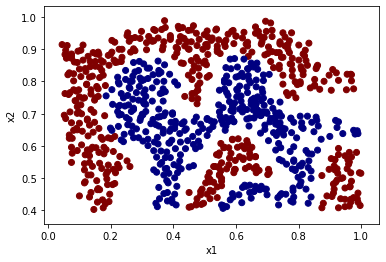

In [14]:
plot_data()

# 2. Model Implementation

In [39]:
from sklearn.svm import SVC
svc1 = SVC(C = 1, kernel = "rbf", gamma = 50)
svc1.fit(X,y.flatten())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
#accuracy
svc1.score(X,y.flatten())

0.9895712630359212

# 3. Performance Evaluation 

In [41]:
def plot_decision_boundary(model):
    x_min,x_max = 0,1
    y_min,y_max = 0.3,1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,500),
                         np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

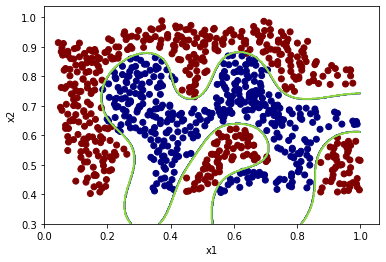

In [42]:
plot_data()
plot_decision_boundary(svc1)

# 4. Practice1: Search for best params

In [44]:
data1 = sio.loadmat("./ex6/ex6data3.mat")
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [47]:
X_train,y_train =data1["X"], data1["y"]
X_val, y_val = data1["Xval"],data1["yval"]

In [50]:
def plot_training_data():
    fig,ax = plt.subplots()
    ax.scatter(X_train[:,0],X_train[:,1],c = y_train.flatten(), cmap = "jet")
    ax.set_xlabel("x1_train")
    ax.set_ylabel("x2_train")
    

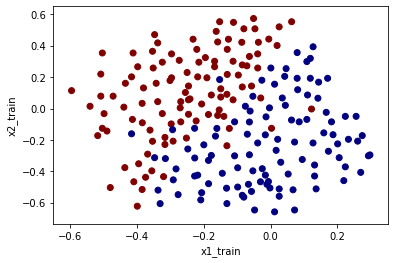

In [51]:
plot_training_data()

In [55]:
Cs = [0.01,0.03,0.1,0.3,1,3,10,30,100]
gammas = [0.01,0.03,0.1,0.3,1,3,10,30,100]

best_score = 0
best_params=(0,0)
for c in Cs:
    for gamma in gammas:
        clf = SVC(kernel = "rbf",C = c, gamma = gamma)
        clf.fit(X_train,y_train.flatten())
        score = clf.score(X_val,y_val.flatten())
        
        if score > best_score:
            best_score =score
            best_params = (c,gamma)
print(best_score, best_params)

0.965 (0.3, 100)


Use our best params to build model

In [57]:
svc2 = SVC(kernel = "rbf", C= best_params[0],gamma = best_params[1])
svc2.fit(X_train,y_train.flatten())

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
def plot_decision_boundary1(model):
    x_min, x_max = -0.6, 0.4
    y_min, y_max = -0.7, 0.6
    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 500),
                        np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    zz =z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

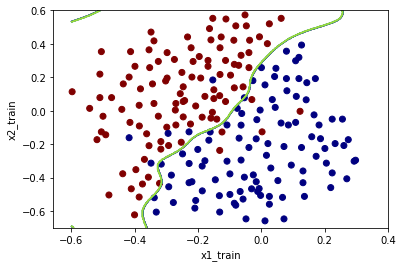

In [65]:
plot_training_data()
plot_decision_boundary1(svc2)

# 5. Practice2 :Email Spam Detection

In [80]:
data_train = sio.loadmat("./ex6/spamTrain.mat")
X_train,y_train = data_train["X"], data_train["y"]
data_test = sio.loadmat("./ex6/spamTest.mat")
X_test,y_test = data_test["Xtest"],data_test["ytest"]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4000, 1899) (4000, 1)
(1000, 1899) (1000, 1)


In [81]:
Cs=[0.01,0.03,0.1,0.3,1,3,10,30,100]
gammas=[0.01,0.03,0.1,0.3,1,3,10,30,100]
best_score = 0
best_params = (0,0)
for c in Cs:
    for gamma in gammas:
        clf = SVC(kernel = "rbf",C = c, gamma = gamma)
        clf.fit(X_train,y_train.flatten())
        score = clf.score(X_test,y_test.flatten())
        
        if score > best_score:
            best_score = score
            best_params = (c,gamma)
print(best_score,best_params)

0.992 (3, 0.01)


In [ ]:
clf = SVC(kernel = "rbf",C= best_params[0],gamma = best_params[1])
clf.fit(X_train,y_train.flatten())
score_train = clf.score(X_train,y_train.flatten())
score_test = clf.score(X_test,y_test.flatten())
print(score_train,score_test, sep="\n")